<a href="https://colab.research.google.com/github/carloscarvajal1cc/Data_Vis/blob/master/DVA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization and Visual Analytics

# Visual Clustering Analysis of Social Network


<br>32146 Data Visualization and Visual Analytics 2019
<br>By Carlos Mario Carvajal Moreno. Student ID: 13144148
<br>and Andres Felipe Lagos Rodriguez. Student ID: 13092248

<p align="justify">The following code represents the visualization of the email network of a company named TACME. With this work we aim to visualize the network and the discovery of clusters within the company, represented by the density of emails that are sent between employees. This work is part of a data mining and AI problem, where clone-knit clusters are intended to be identified in order to find abnormal network patterns in the company.

<br><p align="justify">The first step is then to install some libraries in python that will help with the creation and visualization of the networks.



## 1. Installataion of relevant libraries

In [0]:
!pip install networkx

In [0]:
!pip install graphviz

In [0]:
!pip install -q pydot

In [0]:
!sudo apt-get install graphviz libgraphviz-dev pkg-config python-pip
!pip install pygraphviz --install-option="--include-path=/usr/include/graphviz" --install-option="--library-path=/usr/lib/graphviz/"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libpython-all-dev libxdot4 python-all python-all-dev
  python-asn1crypto python-cffi-backend python-crypto python-cryptography
  python-dbus python-enum34 python-gi python-idna python-ipaddress
  python-keyring python-keyrings.alt python-pip-whl python-pkg-resources
  python-secretstorage python-setuptools python-six python-wheel python-xdg
Suggested packages:
  gvfs python-crypto-doc python-cryptography-doc python-cryptography-vectors
  python-dbus-dbg python-dbus-doc python-enum34-doc python-gi-cairo
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0 python-fs
  python-gdata python-keyczar python-secretstorage-doc python-setuptools-

In [0]:
!pip install markov_clustering[drawing]

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph
from matplotlib.pyplot import figure
import pygraphviz as pgv
import markov_clustering as mc
import networkx as nx
import numpy as np
import pandas as pd
import io
from matplotlib.lines import Line2D

## 2. Tacme's email Network Visualizations.

<br><p align="justify">After installing all relevant libraries, the next step is to construct the network based on the company's information as displayed below:


![alt text](https://github.com/carloscarvajal1cc/Data_Vis/blob/master/A3.png?raw=true)


<br><p align="justify">The email dataset is presented as follow:

![alt text](https://github.com/carloscarvajal1cc/Data_Vis/blob/master/data.png?raw=true)
  

<br><p align="justify">With the previous information the network is built as follow, including the weights:

In [0]:
# Creating Tacme's email network:

TacmeNetwork = nx.Graph()
TacmeNetwork.add_edge('0','1', weight = 1)
TacmeNetwork.add_edge('0','2', weight = 1)
TacmeNetwork.add_edge('1','2', weight = 1)

TacmeNetwork.add_edge('2','3', weight = 2)
TacmeNetwork.add_edge('2','4', weight = 2)
TacmeNetwork.add_edge('2','5', weight = 3)

TacmeNetwork.add_edge('3','6', weight = 4)
TacmeNetwork.add_edge('3','7', weight = 5)
TacmeNetwork.add_edge('3','8', weight = 5)

TacmeNetwork.add_edge('4','9', weight = 6)
TacmeNetwork.add_edge('4','10', weight = 4)
TacmeNetwork.add_edge('4','11', weight = 5)
TacmeNetwork.add_edge('4','12', weight = 7)
TacmeNetwork.add_edge('4','13', weight = 4)
TacmeNetwork.add_edge('4','14', weight = 5)

TacmeNetwork.add_edge('5','15', weight = 5)
TacmeNetwork.add_edge('5','16', weight = 3)
TacmeNetwork.add_edge('5','17', weight = 5)

TacmeNetwork.add_edge('6','7', weight = 3)
TacmeNetwork.add_edge('6','8', weight = 4)

TacmeNetwork.add_edge('7','8', weight = 4)

TacmeNetwork.add_edge('9','10', weight = 2)
TacmeNetwork.add_edge('9','11', weight = 4)
TacmeNetwork.add_edge('9','12', weight = 7)
TacmeNetwork.add_edge('9','13', weight = 2)
TacmeNetwork.add_edge('9','14', weight = 4)

TacmeNetwork.add_edge('10','11', weight = 5)
TacmeNetwork.add_edge('10','12', weight = 5)
TacmeNetwork.add_edge('10','13', weight = 4)
TacmeNetwork.add_edge('10','14', weight = 3)

TacmeNetwork.add_edge('11','12', weight = 3)
TacmeNetwork.add_edge('11','13', weight = 4)

TacmeNetwork.add_edge('12','14', weight = 3)

TacmeNetwork.add_edge('15','16', weight = 3)
TacmeNetwork.add_edge('15','17', weight = 4)

TacmeNetwork.add_edge('16','17', weight = 5)

TacmeNetwork.add_edge('17','7', weight = 1)

TacmeNetwork.add_edge('16','6', weight = 2)
TacmeNetwork.add_edge('16','7', weight = 2)
TacmeNetwork.add_edge('16','8', weight = 3)
TacmeNetwork.add_edge('16','9', weight = 2)
TacmeNetwork.add_edge('16','11', weight = 2)
TacmeNetwork.add_edge('16','13', weight = 2)
TacmeNetwork.add_edge('16','14', weight = 2)
TacmeNetwork.add_edge('16','10', weight = 2)

#The number of edges  and nodes in this network is:

print('The number of nodes in this network are: {}'.format(TacmeNetwork.number_of_nodes()))
print('and the number of edges in this network are: {}'.format(TacmeNetwork.number_of_edges()))


The number of nodes in this network are: 18
and the number of edges in this network are: 45


### 2.1. First attempt visualization.

<br><p align="justify">As it is required to achieve a visualization with aesthetic rules such as symmetrical display, minimization of edge crossing and  maximization of angular resolution, along with the mapping of the data attributes ID and weight to graphical attributes, we intend to evolve the graph based on improvements of these requirements.

<br><p align="justify">Consequently the first graph to visualize can be find as follow:

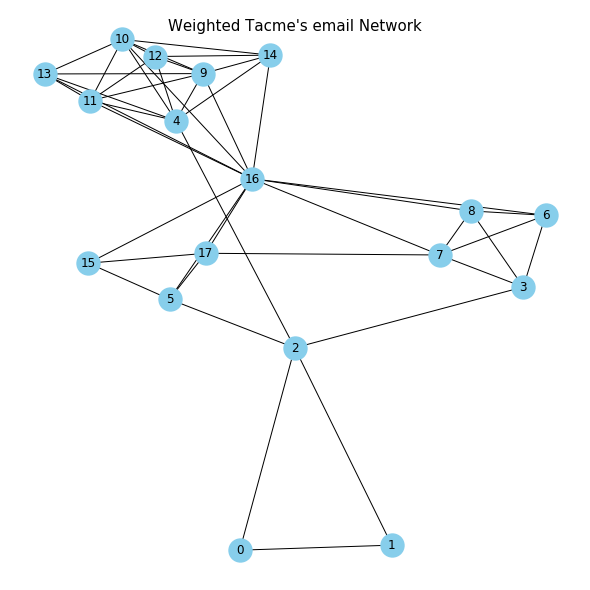

In [0]:
plt.figure(figsize=(8,8))
plt.suptitle("Weighted Tacme's email Network", fontsize=15)
print(" ")

nx.draw_spring(TacmeNetwork, with_labels=True,  node_size=500,
               node_color='skyblue', linewidths=2, overlap = False)

plt.show()

### 2.2. Second attempt visualization.

<br><p align="justify"> The previous graph visualization present several problems, such as minimal angular resolution, several edge crossing problems and lack of symmetry. Therefore, as an attempt to improve the symmetry problem and mapping the data attributes to graphic attributes, the following visualization is achieved:

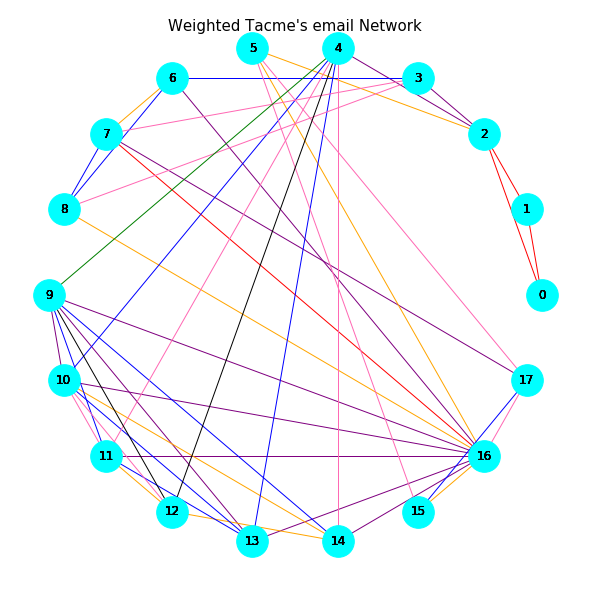

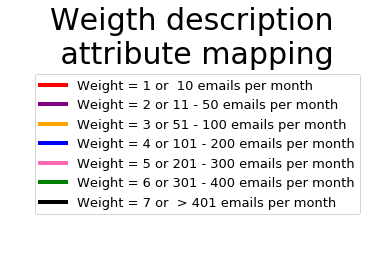

In [131]:
nx.spring_layout(TacmeNetwork)
plt.figure(figsize=(8,8))
plt.suptitle("Weighted Tacme's email Network", fontsize=15)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('0', '1'), ('0', '2'),
                          ('1', '2'), ('16', '7')], edge_width = 50, edge_color = 'red')
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('2', '3'), ('2', '4'),
                          ('9', '10'), ('9', '13'),
                         ('16','6'), ('17','7'),
                         ('16','9'), ('16','11'),
                         ('16','13'),('16','14'),('16','10')],
              edge_color = 'purple', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('2', '5'), ('5', '16'),
                          ('6', '7'), ('10', '14'),
                         ('11','12'), ('12','14'),
                         ('15','16'), ('16','8')],
              edge_color = 'orange', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('3', '6'), ('4', '10'),
                          ('4', '13'), ('6', '8'),
                         ('7','8'), ('9','11'),
                         ('9','14'), ('10','13'),
                         ('11','13'),('15','17')],
              edge_color = 'blue', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('3', '7'), ('3', '8'),
                          ('4', '11'), ('4', '14'),
                         ('5','15'), ('5','17'),
                         ('10','11'), ('10','12'),
                         ('16','17')],
              edge_color = 'hotpink', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('4', '9')],
              edge_color = 'green', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('4', '12'), ('9', '12')],
              edge_color = 'black', node_color = 'cyan', node_size= 1000, edge_width = 50)


custom_lines = [Line2D([0], [0], color='Red', lw=4),
                Line2D([0], [0], color='Purple', lw=4),
                Line2D([0], [0], color='Orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='hotpink', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='black', lw=4)]

fig, ax = plt.subplots()
plt.suptitle('Weigth description\n attribute mapping', fontsize=30)
plt.axis('off')
ax.legend(custom_lines, ['Weight = 1 or  10 emails per month',
                         'Weight = 2 or 11 - 50 emails per month',
                         'Weight = 3 or 51 - 100 emails per month',
                         'Weight = 4 or 101 - 200 emails per month',
                         'Weight = 5 or 201 - 300 emails per month',
                         'Weight = 6 or 301 - 400 emails per month', 
                         'Weight = 7 or  > 401 emails per month'],
         loc = 'center', fontsize=13)

<br><p align="justify">A better visualization has been achieved, having a symmetric distribution of the nodes and an improvement of angular resolution. However, due to the nature of the symmetric shape, the edge crossing problem arises. Therefore, the following visualization is constructed, minimizing the edge crossing problem, maximizing angular resolution and optimizing symmetry in order to make the enhance the human cognition process. 

<br> 

### 2.3 Final Visualization 

<br><p align="justify">The following visualization presents data attribute mapping to graphical attributes, Symmetry, Maximization of angular resolution and Minimization of edge crossing.

<Figure size 1800x1800 with 0 Axes>

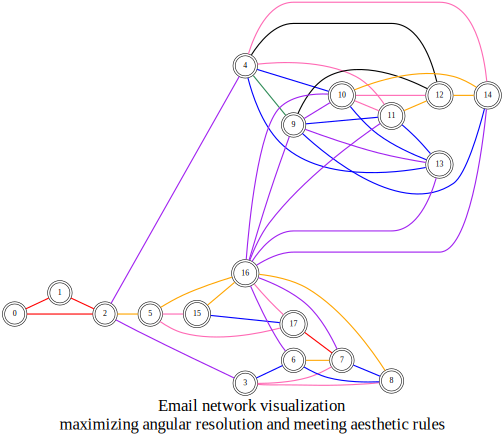

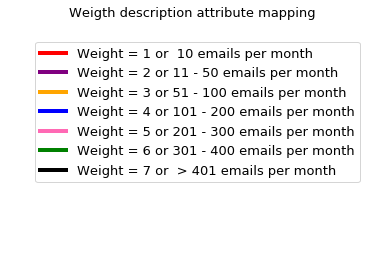

In [0]:
# Drawing using curve lines to meet aesthetic rules, minimize edge crossing and
# maximize angular resolution

plt.figure(figsize=(25,25))
f = Digraph()
f.attr(rankdir='LR', size='7')
f.attr('node', shape='doublecircle')
f.node('0')
f.node('1')
f.node('2')
f.node('3')
f.node('4')
f.node('5')
f.node('6')
f.node('7')
f.node('8')
f.node('9')
f.node('10')
f.node('11')
f.node('12')
f.node('13')
f.node('14')
f.node('15')
f.node('16')
f.node('17')
f.attr('node', shape='circle')
f.edge('0', '1', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('0', '2', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('1', '2', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('2', '3', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('2', '4', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('2', '5', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('3', '6', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('3', '7', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('3', '8', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('4', '9', color='seagreen', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('4', '10', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('4', '11', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('4', '12', color='black', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('4', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('4', '14', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('5', '15', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('5', '16', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('5', '17', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('6', '7', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('6', '8', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('7', '8', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('9', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('9', '11', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('9', '12', label=' ', color='black', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('9', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('9', '14', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('10', '11', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('10', '12', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('10', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('10', '14', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('11', '12', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('11', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('12', '14', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('15', '16', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('15', '17', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('16', '17', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('17', '7', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('16', '6', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('16', '7', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('16', '8', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('16', '9', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('16', '11', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('16', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('16', '14', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
f.edge('16', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')

plt.show()
f.attr(overlap='false')
f.attr(label=r'Email network visualization\n'
             r'maximizing angular resolution and meeting aesthetic rules')
f.attr(fontsize='30')
  

custom_lines = [Line2D([0], [0], color='Red', lw=4),
                Line2D([0], [0], color='Purple', lw=4),
                Line2D([0], [0], color='Orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='hotpink', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='black', lw=4)]
fig, ax = plt.subplots()
plt.suptitle('Weigth description attribute mapping', fontsize=13)
plt.axis('off')
ax.legend(custom_lines, ['Weight = 1 or  10 emails per month',
                         'Weight = 2 or 11 - 50 emails per month',
                         'Weight = 3 or 51 - 100 emails per month',
                         'Weight = 4 or 101 - 200 emails per month',
                         'Weight = 5 or 201 - 300 emails per month',
                         'Weight = 6 or 301 - 400 emails per month', 
                         'Weight = 7 or  > 401 emails per month'],
         loc = 'upper center', fontsize=13)

f

## 3. Markov Clustering

The following section intends to cluster TACME's email network into clustered structures by using Markov Clustering algorithm. Two clustered structures will be presented. a cluster with weight and a cluster without weight.

### 3.1. Markov Cluster with weight.

the clusters are: [(0, 1, 2, 5, 15, 16, 17), (3, 6, 7, 8), (4, 9, 10, 11, 12, 13, 14)]


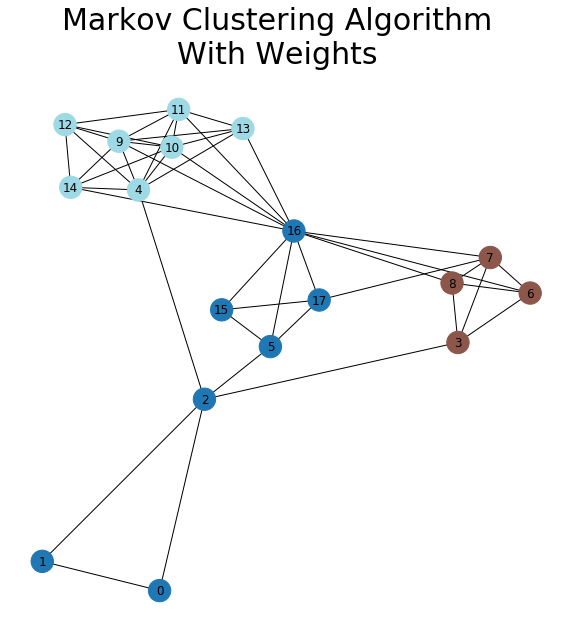

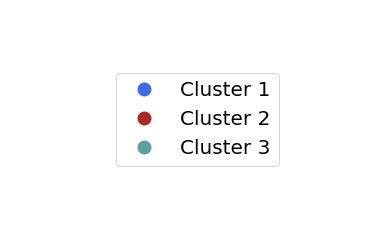

In [0]:
#Markov cluster


#converting to matrix

matrix = nx.to_numpy_matrix(TacmeNetwork)

#Perform Markov cluster to the constructed matrix and 

result = mc.run_mcl(matrix)
clusters = mc.get_clusters(result)

print('the clusters are: {}'.format(clusters))

plt.figure(figsize=(10,10))
plt.suptitle('Markov Clustering Algorithm\nWith Weights', fontsize=30)
d=mc.draw_graph(matrix, clusters,
              node_size=500, with_labels=True,
              edge_color="black")

legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor='royalblue', markersize=15,
                         label = 'Cluster 1' ),
                Line2D([0], [0], marker='o', color='w',
                       markerfacecolor='brown', markersize=15,
                      label = 'Cluster 2'),
                Line2D([0], [0], marker='o',color='w',
                       markerfacecolor='cadetblue', markersize=15,
                      label = 'Cluster 3'),
             
]
plt.show()

fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center', fontsize = 20)
plt.axis('off')
plt.show()



As the visualization performed by the Markov clustering, contains minimal angular resolution it is necessary to draw the visualization using geometric rectangles to bound the clusters while maintining the aesthetic rules and attribute mapping achieved previously.

#### 3.1.1. Markov Clustering with weight visualization.

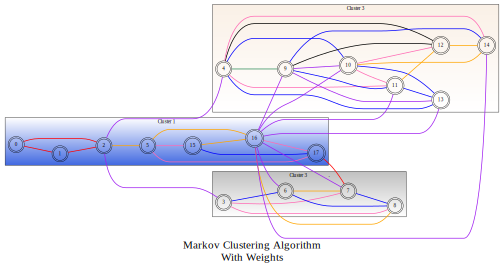

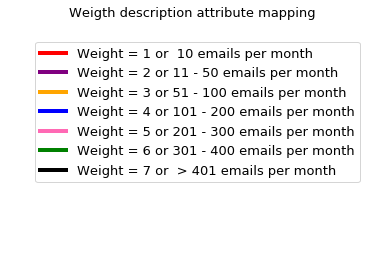

In [0]:
#Clustering according to Markov with weight

H = Digraph()
H.attr(rankdir='LR', size='7', compound='true')

H.attr('node', shape='doublecircle')
H.node('0')
H.node('1')
H.node('2')
H.node('3')
H.node('4')
H.node('5')
H.node('6')
H.node('7')
H.node('8')
H.node('9')
H.node('10')
H.node('11')
H.node('12')
H.node('13')
H.node('14')
H.node('15')
H.node('16')
H.node('17')


H.attr('node', shape='circle')

with H.subgraph(name='cluster0') as c:
    c.attr(fillcolor='royalblue:white',
           style='filled', gradientangle='90', label='Cluster 1', outputMode = 'edgefirst')
    c.node('0')
    c.node('1')
    c.node('2')
    c.node('5')
    c.node('15')
    c.node('16')
    c.node('17')
       
    
with H.subgraph(name='cluster2') as c:
    c.attr(fillcolor='white:grey',
           style='filled', gradientangle='90', label='Cluster 3                     .')
    c.node('3')
    c.node('6')
    c.node('7')
    c.node('8')
    
with H.subgraph(name='cluster3') as c:
    c.attr(fillcolor='linen:white',
           style='filled', gradientangle='270', label='Cluster 3')
    c.node('4')
    c.node('9')
    c.node('10')
    c.node('11')
    c.node('12')
    c.node('13')
    c.node('14')


H.edge('0', '1', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('0', '2', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('1', '2', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('2', '3', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('2', '4', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('2', '5', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('3', '6', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('3', '7', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('3', '8', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '9', color='seagreen', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '10', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '11', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '12', color='black', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '14', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('5', '15', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('5', '16', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('5', '17', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('6', '7', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('6', '8', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('7', '8', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '11', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '12', label=' ', color='black', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '14', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('10', '11', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('10', '12', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('10', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('10', '14', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('11', '12', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('11', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('12', '14', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('15', '16', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('15', '17', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '17', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('17', '7', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '6', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '7', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '8', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '9', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '11', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '14', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')


H.attr(overlap='false')
H.attr(label=r'Markov Clustering Algorithm\n'
             r'With Weights')
H.attr(fontsize='30')


custom_lines = [Line2D([0], [0], color='Red', lw=4),
                Line2D([0], [0], color='Purple', lw=4),
                Line2D([0], [0], color='Orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='hotpink', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='black', lw=4)]
fig, ax = plt.subplots()
plt.suptitle('Weigth description attribute mapping', fontsize=13)
plt.axis('off')
ax.legend(custom_lines, ['Weight = 1 or  10 emails per month',
                         'Weight = 2 or 11 - 50 emails per month',
                         'Weight = 3 or 51 - 100 emails per month',
                         'Weight = 4 or 101 - 200 emails per month',
                         'Weight = 5 or 201 - 300 emails per month',
                         'Weight = 6 or 301 - 400 emails per month', 
                         'Weight = 7 or  > 401 emails per month'],
         loc = 'upper center', fontsize=13)
H    
   



#### 3.1.2. Markov Clustering with Inflation.


<br><p align="justify">A parameter Inflation has been taken in consideration as part of the operation made by the Markov cluster algorithm. As the parameter inflation is set as 2 by deffault, the previous visualization was achieved by this. However, for the purpose of finding patterns in this network, it is necessary to manipulate this parameter so the results produced by the algorithm are able to show trends.

<br><p align="justify">Inflation raises the nth power of the matrix according to a set parameter (positive value) and then re-normalizes the values in the matrix. Thus, strong neighbors or a pair of nodes with a heavy weight are assigned a greater strength, while weak neighbors, or pairs of nodes with lightweight or large distance are weakened or punished, influecing the granularity of clusters.
  

<br><p align="justify">Therefore, with this technique we are increasing the weight of the edges that are "heavy", and weakend those that are "lightweight", changing a bit the granularity of the clusters made previously.



the clusters with inflation set to 2.5 are: [(0, 1, 2), (3, 6, 7, 8), (4, 9, 10, 11, 12, 13, 14), (5, 15, 16, 17)]


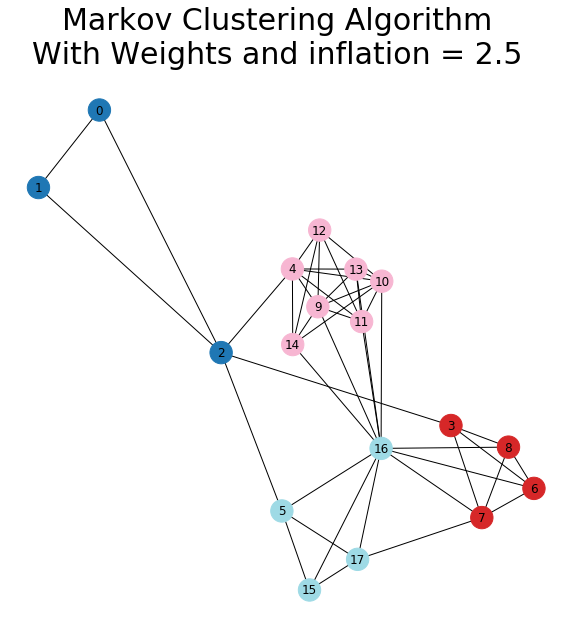

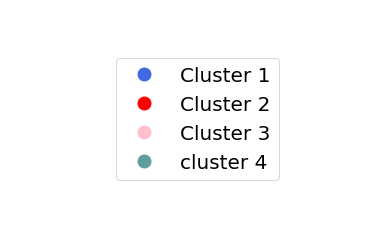

In [0]:

#Markov cluster with inflation set to 2.5

matrix = nx.to_numpy_matrix(TacmeNetwork)

result = mc.run_mcl(matrix, inflation = 2.5)
clusters = mc.get_clusters(result)

print('the clusters with inflation set to 2.5 are: {}'.format(clusters))

plt.figure(figsize=(10,10))
plt.suptitle('Markov Clustering Algorithm\nWith Weights and inflation = 2.5', fontsize=30)
d=mc.draw_graph(matrix, clusters,
              node_size=500, with_labels=True,
              edge_color="black")

legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor='royalblue', markersize=15,
                         label = 'Cluster 1' ),
                Line2D([0], [0], marker='o', color='w',
                       markerfacecolor='red', markersize=15,
                      label = 'Cluster 2'),
                Line2D([0], [0], marker='o',color='w',
                       markerfacecolor='Pink', markersize=15,
                      label = 'Cluster 3'),
                Line2D([0], [0], marker='o',color='w', 
                       markerfacecolor='cadetblue', markersize=15,
                      label = 'cluster 4'),
                
]
plt.show()

fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center', fontsize = 20)
plt.axis('off')
plt.show()


#### 3.1.3. Markov Clustering  with Inflation Visualization.


<br><p align="justify"> As the visualization performed by the Markov clustering, contains minimal angular resolution it is necessary to draw the visualization using geometric rectangles to bound the clusters while maintining the aesthetic rules and attribute mapping achieved previously.

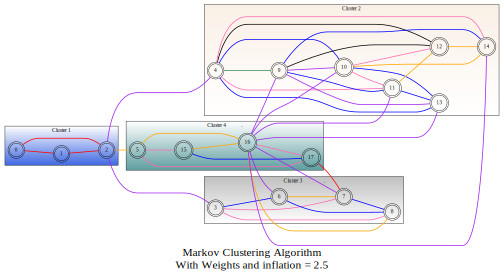

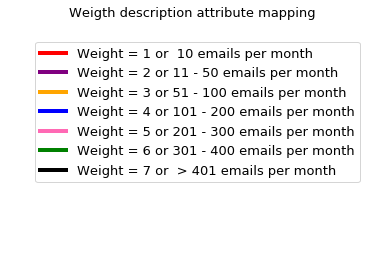

In [0]:

k = Digraph()
k.attr(rankdir='LR', size='7', compound='true')

k.attr('node', shape='doublecircle')
k.node('0')
k.node('1')
k.node('2')
k.node('3')
k.node('4')
k.node('5')
k.node('6')
k.node('7')
k.node('8')
k.node('9')
k.node('10')
k.node('11')
k.node('12')
k.node('13')
k.node('14')
k.node('15')
k.node('16')
k.node('17')


k.attr('node', shape='circle')

with k.subgraph(name='cluster0') as c:
    c.attr(fillcolor='royalblue:white',
           style='filled', gradientangle='90', label='Cluster 1')
    c.node('0')
    c.node('1')
    c.node('2')
    

with k.subgraph(name='cluster1') as c:
    c.attr(fillcolor='cadetblue:white',
           style='filled', gradientangle='90', label='Cluster 4               .')
    c.node('5')
    c.node('15')
    c.node('16')
    c.node('17')
              
    
with k.subgraph(name='cluster2') as c:
    c.attr(fillcolor='white:grey',
           style='filled', gradientangle='90', label='Cluster 3                     .')
    c.node('3')
    c.node('6')
    c.node('7')
    c.node('8')
    
with k.subgraph(name='cluster3') as c:
    c.attr(fillcolor='linen:white',
           style='filled', gradientangle='270', label='Cluster 2')
    c.node('4')
    c.node('9')
    c.node('10')
    c.node('11')
    c.node('12')
    c.node('13')
    c.node('14')


k.edge('0', '1', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('0', '2', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('1', '2', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('2', '3', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('2', '4', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('2', '5', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('3', '6', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('3', '7', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('3', '8', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('4', '9', color='seagreen', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('4', '10', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('4', '11', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('4', '12', color='black', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('4', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('4', '14', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('5', '15', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('5', '16', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('5', '17', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('6', '7', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('6', '8', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('7', '8', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('9', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('9', '11', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('9', '12', label=' ', color='black', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('9', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('9', '14', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('10', '11', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('10', '12', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('10', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('10', '14', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('11', '12', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('11', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('12', '14', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('15', '16', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('15', '17', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('16', '17', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('17', '7', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('16', '6', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('16', '7', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('16', '8', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('16', '9', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('16', '11', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('16', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('16', '14', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
k.edge('16', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')


k.attr(overlap='false')
k.attr(label=r'Markov Clustering Algorithm\n'
             r'With Weights and inflation = 2.5')
k.attr(fontsize='30')


custom_lines = [Line2D([0], [0], color='Red', lw=4),
                Line2D([0], [0], color='Purple', lw=4),
                Line2D([0], [0], color='Orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='hotpink', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='black', lw=4)]
fig, ax = plt.subplots()
plt.suptitle('Weigth description attribute mapping', fontsize=13)
plt.axis('off')
ax.legend(custom_lines, ['Weight = 1 or  10 emails per month',
                         'Weight = 2 or 11 - 50 emails per month',
                         'Weight = 3 or 51 - 100 emails per month',
                         'Weight = 4 or 101 - 200 emails per month',
                         'Weight = 5 or 201 - 300 emails per month',
                         'Weight = 6 or 301 - 400 emails per month', 
                         'Weight = 7 or  > 401 emails per month'],
         loc = 'upper center', fontsize=13)
k    
   


### 3.2. Markov Cluster without weight.

To achieve a clustering without considering the weights, we constructed a new network leaving the weights between edges out of contemplation. The following code builds the unweighted network.

In [0]:
unweighted = nx.Graph()
unweighted.add_edge('0','1')
unweighted.add_edge('0','2')
unweighted.add_edge('1','2')

unweighted.add_edge('2','3')
unweighted.add_edge('2','4')
unweighted.add_edge('2','5')

unweighted.add_edge('3','6')
unweighted.add_edge('3','7')
unweighted.add_edge('3','8')

unweighted.add_edge('4','9')
unweighted.add_edge('4','10')
unweighted.add_edge('4','11')
unweighted.add_edge('4','12')
unweighted.add_edge('4','13')
unweighted.add_edge('4','14')

unweighted.add_edge('5','15')
unweighted.add_edge('5','16')
unweighted.add_edge('5','17')

unweighted.add_edge('6','7')
unweighted.add_edge('6','8')

unweighted.add_edge('7','8')

unweighted.add_edge('9','10')
unweighted.add_edge('9','11')
unweighted.add_edge('9','12')
unweighted.add_edge('9','13')
unweighted.add_edge('9','14')

unweighted.add_edge('10','11')
unweighted.add_edge('10','12')
unweighted.add_edge('10','13')
unweighted.add_edge('10','14')

unweighted.add_edge('11','12')
unweighted.add_edge('11','13')

unweighted.add_edge('12','14')

unweighted.add_edge('15','16')
unweighted.add_edge('15','17')

unweighted.add_edge('16','17')

unweighted.add_edge('17','7')

unweighted.add_edge('16','6')
unweighted.add_edge('16','7')
unweighted.add_edge('16','8')
unweighted.add_edge('16','9')
unweighted.add_edge('16','11')
unweighted.add_edge('16','13')
unweighted.add_edge('16','14')
unweighted.add_edge('16','10')


#### 3.2.1 Unweighted network visualization

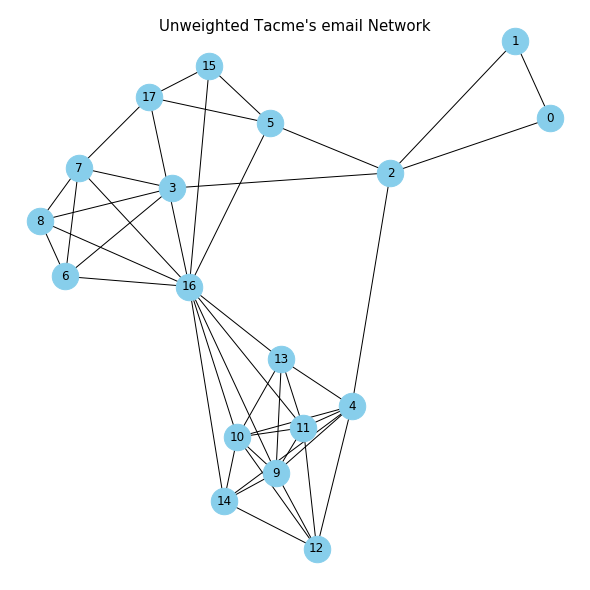

In [0]:
plt.figure(figsize=(8,8))
plt.suptitle("Unweighted Tacme's email Network", fontsize=15)


nx.draw(unweighted, with_labels=True,
        node_size=700, node_color="skyblue",
        pos=nx.fruchterman_reingold_layout(unweighted), overlap =False)



plt.show()


#### 3.2.2. Markov Clustering algorithm.

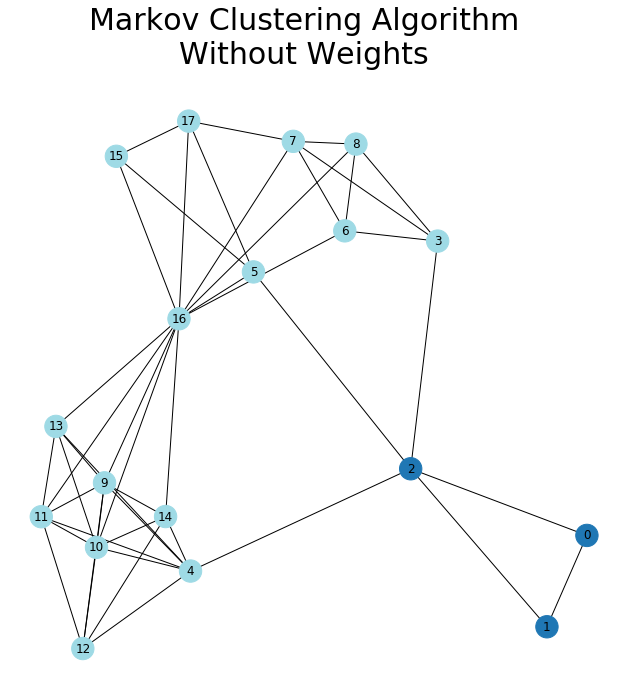

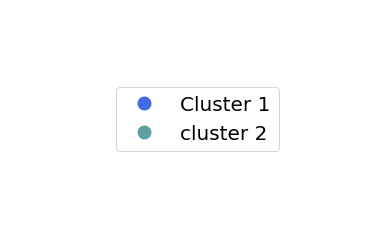

the clusters are: [(0, 1, 2), (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)]


In [0]:
# marcov unweighted

matrix = nx.to_numpy_matrix(unweighted)

result = mc.run_mcl(matrix )
clusters = mc.get_clusters(result)

plt.figure(figsize=(11,11))
plt.suptitle('Markov Clustering Algorithm\nWithout Weights', fontsize=30)
d=mc.draw_graph(matrix, clusters,
              node_size=500, with_labels=True,
              edge_color="black")


legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor='royalblue', markersize=15,
                         label = 'Cluster 1' ),
                Line2D([0], [0], marker='o',color='w', 
                       markerfacecolor='cadetblue', markersize=15,
                      label = 'cluster 2')
]
plt.show()

fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center', fontsize = 20)
plt.axis('off')
plt.show()

print('the clusters are: {}'.format(clusters))


#### 3.2.3. Markov Clustering without weight visualization.

<br><p align="justify">As the previous visualization contains edgecrossing problems, as well as low angular resolution, the following visualization is created to improve readability, aesthetic rules and information mapping, along with a bounding of clusters by the usage of rectangles.

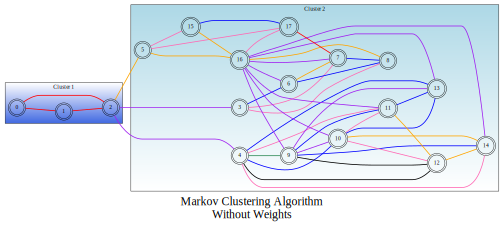

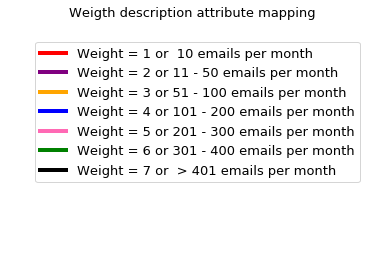

In [0]:
#Clustering according to Markov without weight

H = Digraph()
H.attr(rankdir='LR', size='7', compound='true')

H.attr('node', shape='doublecircle')
H.node('0')
H.node('1')
H.node('2')
H.node('3')
H.node('4')
H.node('5')
H.node('6')
H.node('7')
H.node('8')
H.node('9')
H.node('10')
H.node('11')
H.node('12')
H.node('13')
H.node('14')
H.node('15')
H.node('16')
H.node('17')


H.attr('node', shape='circle')

with H.subgraph(name='cluster0') as c:
    c.attr(fillcolor='royalblue:white',
           style='filled', gradientangle='90', label='Cluster 1')
    c.node('0')
    c.node('1')
    c.node('2')

with H.subgraph(name='cluster1') as c:
    c.attr(fillcolor='white:lightblue',
           style='filled', gradientangle='90', label='Cluster 2', outputMode = "breadthfirst")
    c.node('5')
    c.node('15')
    c.node('16')
    c.node('17')   
    c.node('3')
    c.node('6')
    c.node('7')
    c.node('8')    
    c.node('4')
    c.node('9')
    c.node('10')
    c.node('11')
    c.node('12')
    c.node('13')
    c.node('14')
    


H.edge('0', '1', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('0', '2', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('1', '2', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('2', '3', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('2', '4', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('2', '5', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('3', '6', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('3', '7', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('3', '8', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '9', color='seagreen', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '10', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '11', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '12', color='black', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('4', '14', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('5', '15', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('5', '16', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('5', '17', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('6', '7', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('6', '8', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('7', '8', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '11', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '12', label=' ', color='black', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '14', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('10', '11', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('10', '12', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('10', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('10', '14', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('11', '12', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('11', '13', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('12', '14', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('15', '16', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('15', '17', color = 'blue', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '17', color='hotpink', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('17', '7', color = 'Red', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '6', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '7', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '8', color = 'orange', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '9', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '11', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '14', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')



H.attr(overlap='false')
H.attr(label=r'Markov Clustering Algorithm\n'
             r'Without Weights')
H.attr(fontsize='30')

custom_lines = [Line2D([0], [0], color='Red', lw=4),
                Line2D([0], [0], color='Purple', lw=4),
                Line2D([0], [0], color='Orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='hotpink', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='black', lw=4)]
fig, ax = plt.subplots()
plt.suptitle('Weigth description attribute mapping', fontsize=13)
plt.axis('off')
ax.legend(custom_lines, ['Weight = 1 or  10 emails per month',
                         'Weight = 2 or 11 - 50 emails per month',
                         'Weight = 3 or 51 - 100 emails per month',
                         'Weight = 4 or 101 - 200 emails per month',
                         'Weight = 5 or 201 - 300 emails per month',
                         'Weight = 6 or 301 - 400 emails per month', 
                         'Weight = 7 or  > 401 emails per month'],
         loc = 'upper center', fontsize=13)
H    



## 4. Findings

To enhance the readability of the weights, the width of the edges will be adjusted according to their values, as follow.

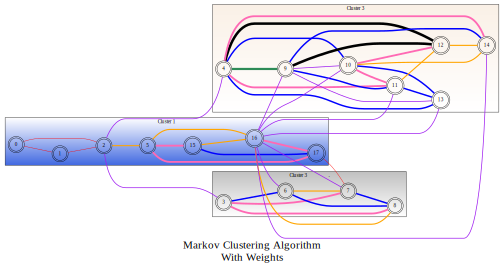

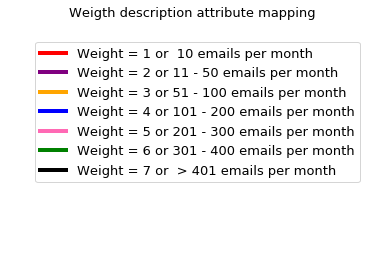

In [132]:
#Clustering according to Markov with weight

H = Digraph()
H.attr(rankdir='LR', size='7', compound='true')

H.attr('node', shape='doublecircle')
H.node('0')
H.node('1')
H.node('2')
H.node('3')
H.node('4')
H.node('5')
H.node('6')
H.node('7')
H.node('8')
H.node('9')
H.node('10')
H.node('11')
H.node('12')
H.node('13')
H.node('14')
H.node('15')
H.node('16')
H.node('17')


H.attr('node', shape='circle')

with H.subgraph(name='cluster0') as c:
    c.attr(fillcolor='royalblue:white',
           style='filled', gradientangle='90', label='Cluster 1', outputMode = 'edgefirst')
    c.node('0')
    c.node('1')
    c.node('2')
    c.node('5')
    c.node('15')
    c.node('16')
    c.node('17')
       
    
with H.subgraph(name='cluster2') as c:
    c.attr(fillcolor='white:grey',
           style='filled', gradientangle='90', label='Cluster 3                     .')
    c.node('3')
    c.node('6')
    c.node('7')
    c.node('8')
    
with H.subgraph(name='cluster3') as c:
    c.attr(fillcolor='linen:white',
           style='filled', gradientangle='270', label='Cluster 3')
    c.node('4')
    c.node('9')
    c.node('10')
    c.node('11')
    c.node('12')
    c.node('13')
    c.node('14')


H.edge('0', '1', color = 'Red', dir= 'none', style="setlinewidth(1)" ,arrowtail='none')
H.edge('0', '2', color = 'Red', dir= 'none', style="setlinewidth(1)" ,arrowtail='none')
H.edge('1', '2', color = 'Red', dir= 'none', style="setlinewidth(1)" ,arrowtail='none')
H.edge('2', '3', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('2', '4', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('2', '5', color = 'orange', dir= 'none', style="setlinewidth(3)" ,arrowtail='none')
H.edge('3', '6', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('3', '7', color='hotpink', dir= 'none', style="setlinewidth(5)" ,arrowtail='none')
H.edge('3', '8', color='hotpink', dir= 'none', style="setlinewidth(5)" ,arrowtail='none')
H.edge('4', '9', color='seagreen', dir= 'none', style="setlinewidth(6)" ,arrowtail='none')
H.edge('4', '10', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('4', '11', color='hotpink', dir= 'none', style="setlinewidth(5)" ,arrowtail='none')
H.edge('4', '12', color='black', dir= 'none', style="setlinewidth(7)" ,arrowtail='none')
H.edge('4', '13', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('4', '14', color='hotpink', dir= 'none', style="setlinewidth(5)" ,arrowtail='none')
H.edge('5', '15', color='hotpink', dir= 'none', style="setlinewidth(5)" ,arrowtail='none')
H.edge('5', '16', color = 'orange', dir= 'none', style="setlinewidth(3)" ,arrowtail='none')
H.edge('5', '17', color='hotpink', dir= 'none', style="setlinewidth(5)" ,arrowtail='none')
H.edge('6', '7', color = 'orange', dir= 'none', style="setlinewidth(3)" ,arrowtail='none')
H.edge('6', '8', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('7', '8', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('9', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '11', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('9', '12', label=' ', color='black', dir= 'none', style="setlinewidth(7)" ,arrowtail='none')
H.edge('9', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('9', '14', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('10', '11', color='hotpink', dir= 'none', style="setlinewidth(5)" ,arrowtail='none')
H.edge('10', '12', color='hotpink', dir= 'none', style="setlinewidth(5)" ,arrowtail='none')
H.edge('10', '13', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('10', '14', color = 'orange', dir= 'none', style="setlinewidth(3)" ,arrowtail='none')
H.edge('11', '12', color = 'orange', dir= 'none', style="setlinewidth(3)" ,arrowtail='none')
H.edge('11', '13', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('12', '14', color = 'orange', dir= 'none', style="setlinewidth(3)" ,arrowtail='none')
H.edge('15', '16', color = 'orange', dir= 'none', style="setlinewidth(3)" ,arrowtail='none')
H.edge('15', '17', color = 'blue', dir= 'none', style="setlinewidth(4)" ,arrowtail='none')
H.edge('16', '17', color='hotpink', dir= 'none', style="setlinewidth(5)" ,arrowtail='none')
H.edge('17', '7', color = 'Red', dir= 'none', style="setlinewidth(1)" ,arrowtail='none')
H.edge('16', '6', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '7', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '8', color = 'orange', dir= 'none', style="setlinewidth(3)" ,arrowtail='none')
H.edge('16', '9', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '11', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '13', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '14', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')
H.edge('16', '10', color = 'purple', dir= 'none', style="setlinewidth(2)" ,arrowtail='none')


H.attr(overlap='false')
H.attr(label=r'Markov Clustering Algorithm\n'
             r'With Weights')
H.attr(fontsize='30')


custom_lines = [Line2D([0], [0], color='Red', lw=4),
                Line2D([0], [0], color='Purple', lw=4),
                Line2D([0], [0], color='Orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='hotpink', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='black', lw=4)]
fig, ax = plt.subplots()
plt.suptitle('Weigth description attribute mapping', fontsize=13)
plt.axis('off')
ax.legend(custom_lines, ['Weight = 1 or  10 emails per month',
                         'Weight = 2 or 11 - 50 emails per month',
                         'Weight = 3 or 51 - 100 emails per month',
                         'Weight = 4 or 101 - 200 emails per month',
                         'Weight = 5 or 201 - 300 emails per month',
                         'Weight = 6 or 301 - 400 emails per month', 
                         'Weight = 7 or  > 401 emails per month'],
         loc = 'upper center', fontsize=13)
H    
   

